In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz 
from IPython.display import Image
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv("titanic-passengers.csv",sep=';')

df['Age'] = df["Age"].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
x = df[['Age']]
y = df["Survived"]

In [4]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size = .25)

In [5]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [6]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.6098654708520179


In [7]:
dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

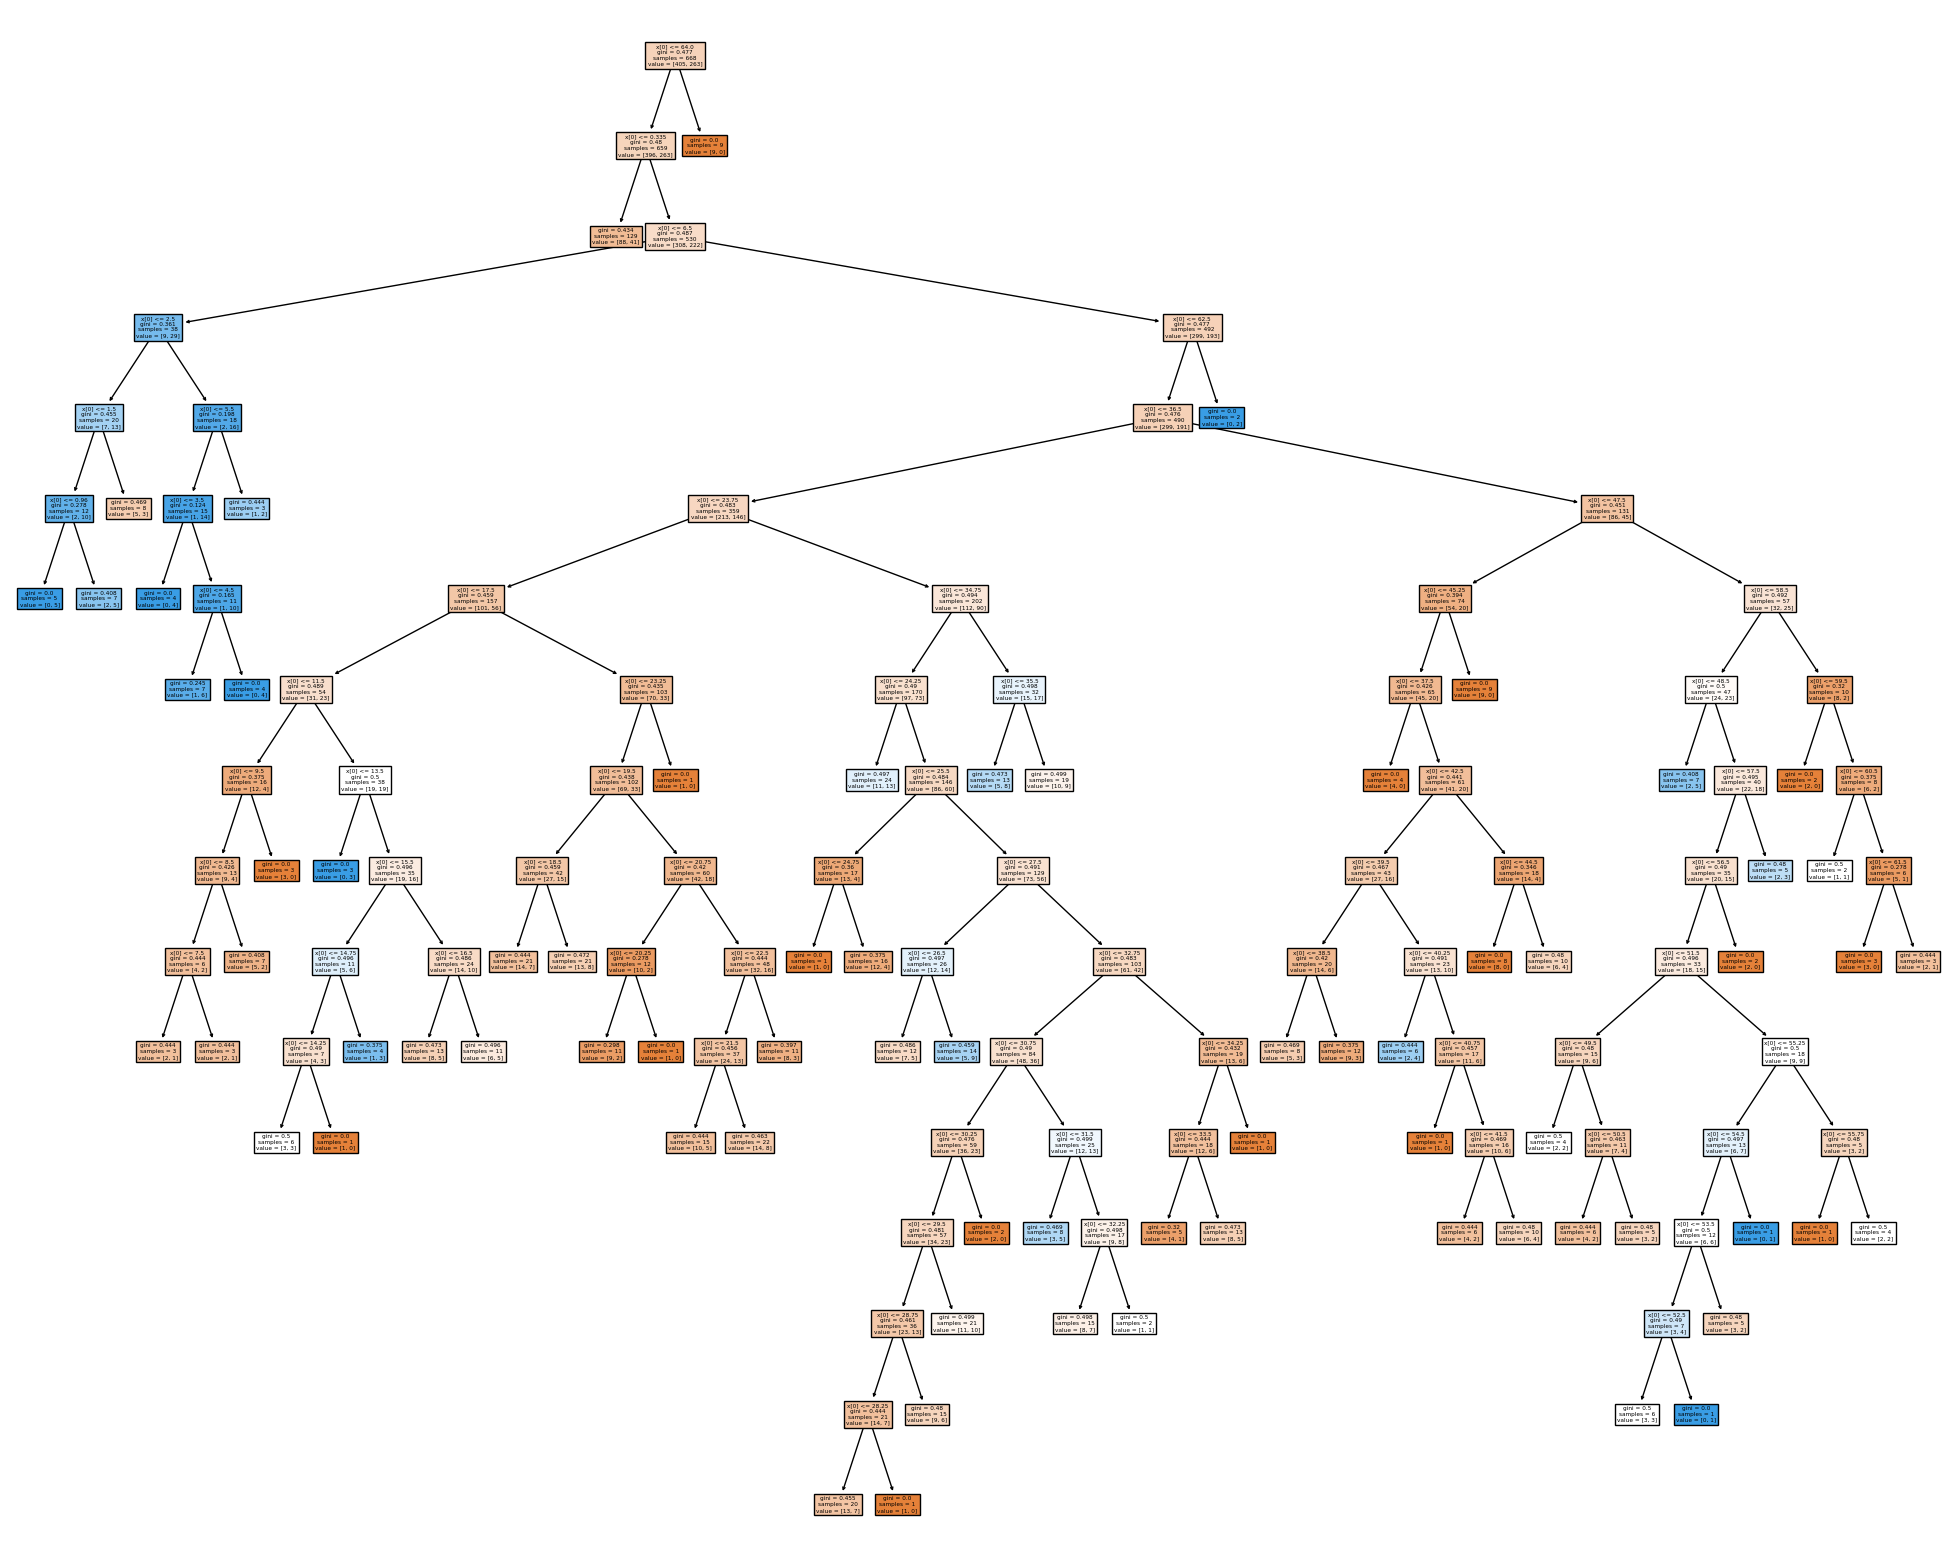

In [8]:
fig = plt.figure(figsize=(25,20))
shape = tree.plot_tree(clf,filled=True)


In [9]:
dtree = tree.DecisionTreeClassifier(criterion = "gini" ,splitter = "random" , max_leaf_nodes = 20, min_samples_leaf = 15, max_depth = 5)

In [10]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=15,
                       splitter='random')

In [11]:
y_pred_1 = dtree.predict(x_test)

In [12]:
print("Accuracy DecisionTreeClassifier :",metrics.accuracy_score(y_test,y_pred))
print("Accuracy After change :",metrics.accuracy_score(y_test,y_pred_1))

Accuracy DecisionTreeClassifier : 0.6098654708520179
Accuracy After change : 0.6278026905829597


In [13]:
clf1 = RandomForestClassifier(n_estimators=10)
clf1.fit(x_train,y_train)
y_pred_forest = clf1.predict(x_test)
print("Accuracy Random Forest Classifier :", metrics.accuracy_score(y_test, y_pred_forest))

Accuracy Random Forest Classifier : 0.600896860986547


In [15]:
print("First Accuracy :",metrics.accuracy_score(y_test,y_pred))
print("Second Accuracy :",metrics.accuracy_score(y_test, y_pred_1))
print("Third Accuracy :",metrics.accuracy_score(y_test,y_pred_forest))

First Accuracy : 0.6098654708520179
Second Accuracy : 0.6278026905829597
Third Accuracy : 0.600896860986547
